In [553]:
# Data Science
import numpy as np
import pandas as pd

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# plotly standard imports
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
# import plotly.io as pio

# Cufflinks wrapper on plotly
import cufflinks as cf

In [554]:
cf.go_offline()
# Setup Global Theme
cf.set_config_file(world_readable=True, theme='space', offline=True)
# pio.templates.default = "ggplot2"

# Input Cells

In [555]:
demography = pd.read_excel('data/all.xlsx')

In [556]:
demography.drop_duplicates('ID', inplace=True)

In [557]:
demography = demography.drop('ID', axis=1)

# Weekly income + Quality

In [558]:
demography.groupby('Favourite category').mean()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.474820,72.848921,0.425827
Czech cuisine,53.759740,56.675325,0.394935
Italian cuisine,50.669065,83.726619,0.432302


In [559]:
demography.groupby('Favourite category').median()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.0,44.0,0.380
Czech cuisine,54.0,38.0,0.345
Italian cuisine,52.0,45.0,0.370


In [560]:
cz = demography[demography['Favourite category'] == 'Czech cuisine']
asian = demography[demography['Favourite category'] == 'Asian cuisine']
it = demography[demography['Favourite category'] == 'Italian cuisine']

In [561]:
# cz['Weekly income'].iplot(kind='hist',
#                     layout=dict(
#                     xaxis=dict(type='log', title='Weekly income'),
#                     yaxis=dict(title='count'),
#                     title='Ceska'))
plt.style.use('fivethirtyeight')

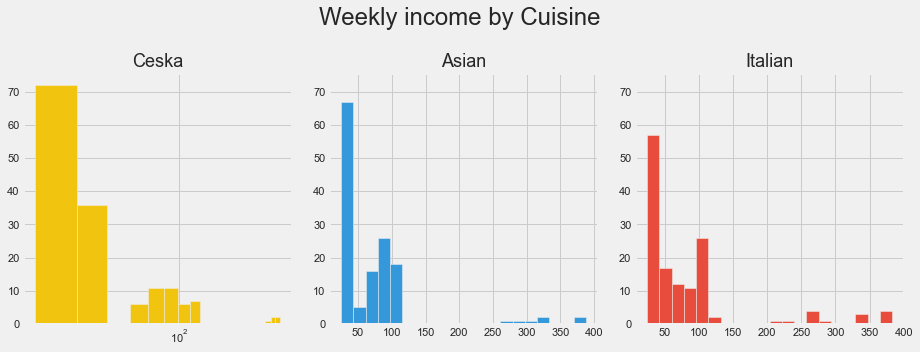

In [562]:
plt.figure(figsize=(13,5))
plt.suptitle("Weekly income by Cuisine", fontsize=24)
ax = plt.subplot(1,3,1)

plt.hist(cz['Weekly income'], label='Ceska', color='#f1c40f', bins=20)
plt.title('Ceska', fontsize=18)
plt.xscale("log")

plt.subplot(1,3, 2, sharey=ax)
plt.hist(asian['Weekly income'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)

plt.subplot(1,3, 3, sharey=ax)
plt.hist(it['Weekly income'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.tight_layout()

In [563]:
# plt.figure(figsize=(13,5))
# ax = plt.subplot(1,3,1)
# plt.suptitle("Preferred quality by Cuisine", fontsize=24)
#
# plt.hist(cz['Preferred quality'], label='Ceska', color='#f1c40f', bins=20)
# plt.title('Ceska', fontsize=18)
#
# plt.subplot(1,3, 2, sharey=ax)
# plt.hist(asian['Preferred quality'], label='Asian', color='#3498db', bins=20)
# plt.title('Asian', fontsize=18)
#
# plt.subplot(1,3, 3, sharey=ax)
# plt.hist(it['Preferred quality'], label='Italian', color='#e74c3c', bins=20)
# plt.title('Italian', fontsize=18)
# plt.tight_layout()

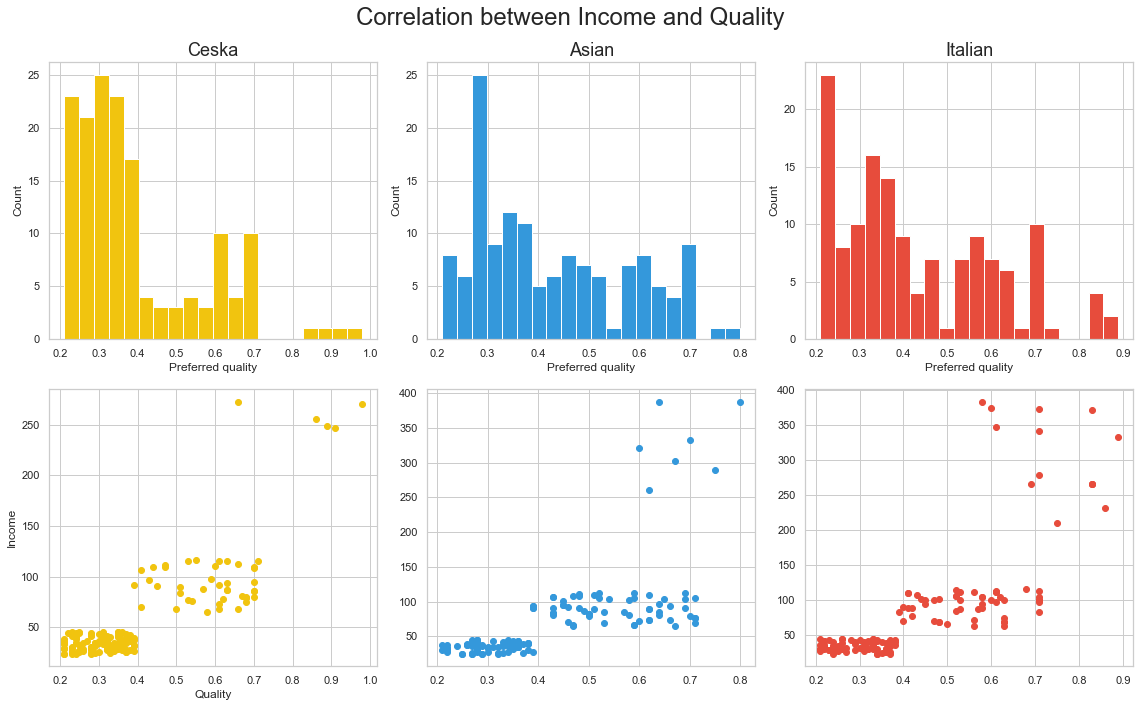

In [620]:
plt.figure(figsize=(16,10))
plt.suptitle("Correlation between Income and Quality", fontsize=24)
plt.tight_layout()

plt.subplot(2,3,1)
plt.title('Ceska', fontsize=18)
plt.hist(cz['Preferred quality'], label='Ceska', color='#f1c40f', bins=20)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,4)
plt.scatter(cz['Preferred quality'], cz['Weekly income'], label='Ceska', color='#f1c40f')
plt.xlabel('Quality')
plt.ylabel('Income')
# plt.ylim(0, 400)

plt.subplot(2,3,2)
plt.hist(asian['Preferred quality'], label='Asian', color='#3498db', bins=20)
plt.title('Asian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,5)
plt.scatter(asian['Preferred quality'], asian['Weekly income'], label='Asian', color='#3498db')

plt.subplot(2,3,3)
plt.hist(it['Preferred quality'], label='Italian', color='#e74c3c', bins=20)
plt.title('Italian', fontsize=18)
plt.xlabel('Preferred quality')
plt.ylabel('Count')
plt.subplot(2,3,6)
plt.scatter(it['Preferred quality'], it['Weekly income'], label='Italian', color='#e74c3c')
plt.tight_layout();

# Stratification by Income

In [565]:
def income_stratification(x):
    if x <= 50:
        return 'low income'
    elif 50 < x < 150:
        return 'medium income'
    return 'high income'

In [566]:
demography['Stratification by income'] = np.vectorize(income_stratification)(demography['Weekly income'])

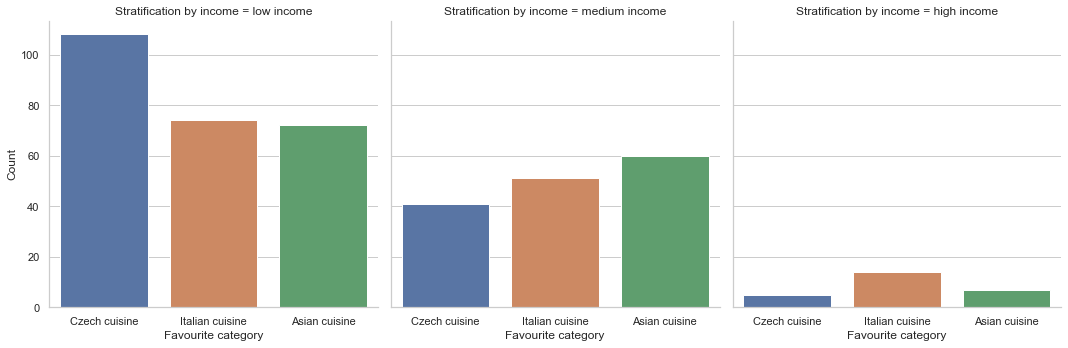

In [624]:
strat_income_category = demography.value_counts(['Favourite category', 'Stratification by income'])
strat_income_category = strat_income_category.reset_index().rename(columns={0:'Count'})
sns.catplot(
    data = strat_income_category,
    kind = 'bar',
    x = 'Favourite category',
    y = 'Count',
    col = 'Stratification by income',
    ci = None
);

In [568]:
# plt.figure(figsize=(15,5))
# plt.suptitle("Correlation between Income and Quality", fontsize=24)
# plt.tight_layout()
#
# plt.subplot(1,3,1)
# plt.title('Czech', fontsize=18)
# plt.scatter(cz['Preferred quality'], cz['Weekly income'], label='Ceska', color='#f1c40f')
#
# plt.subplot(1,3,2)
# plt.title('Asian', fontsize=18)
# plt.scatter(asian['Preferred quality'], asian['Weekly income'], label='Asian', color='#3498db')
#
# plt.subplot(1,3,3)
# plt.title('Italian', fontsize=18)
# plt.scatter(it['Preferred quality'], it['Weekly income'], label='Italian', color='#e74c3c');

# Favourite category

In [604]:
demography.value_counts('Favourite category').iplot(kind='bar', linecolor="black", title="Count by Category")

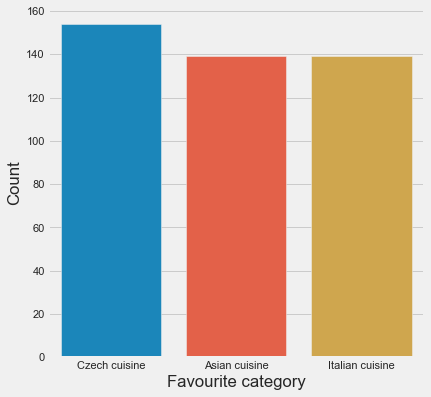

In [570]:
fixed_fcat = demography.value_counts('Favourite category').reset_index().rename(columns={0:'Count'})

plt.figure(figsize=(6,6))
sns.barplot(data=fixed_fcat, x='Favourite category', y='Count')
sns.set_theme(style="whitegrid")

# Ad Type

In [571]:
demography.value_counts('Favourite ad type')

Favourite ad type
promo stand big          208
print-on-bus              68
citylight                 59
promo stand small         36
hostess on the street     31
billboard                 27
radio spot                 3
dtype: int64

# Ad Type by Category (Asia, Czechia, Italia)

In [572]:
cat_ad_graph = demography[['Favourite ad type', 'Favourite category']].groupby('Favourite ad type').value_counts()\
    .unstack()

In [573]:
asia = cat_ad_graph['Asian cuisine'].reset_index()

In [574]:
czech = cat_ad_graph['Czech cuisine'].reset_index()

In [575]:
italia =  cat_ad_graph['Italian cuisine'].reset_index()

#================================================

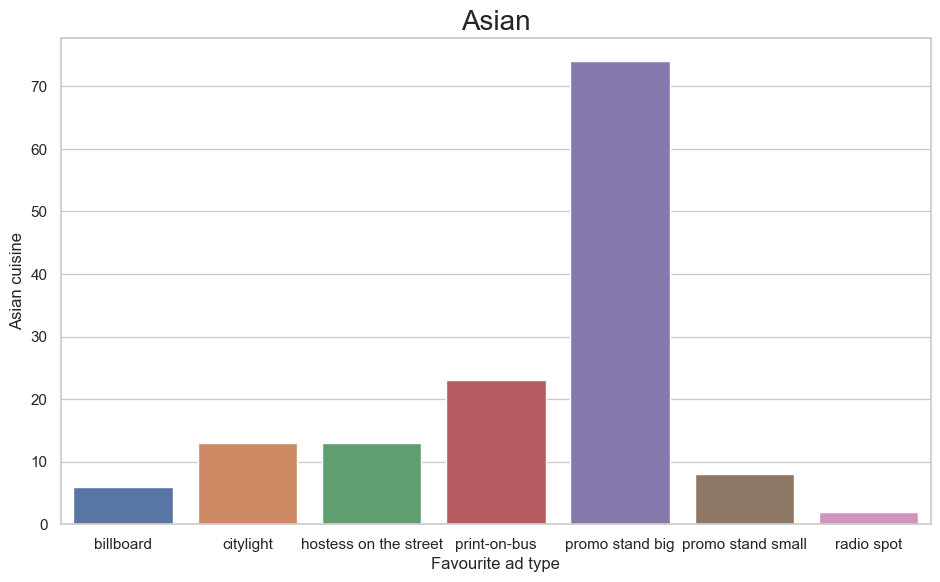

In [576]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asia, x='Favourite ad type', y='Asian cuisine')
plt.title('Asian', fontsize=20);

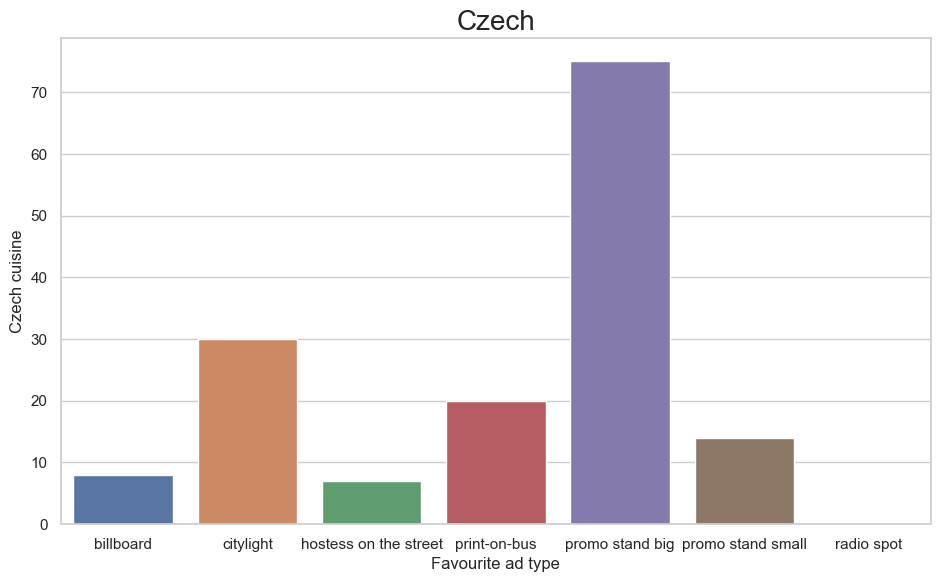

In [577]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine')
plt.title('Czech', fontsize=20);

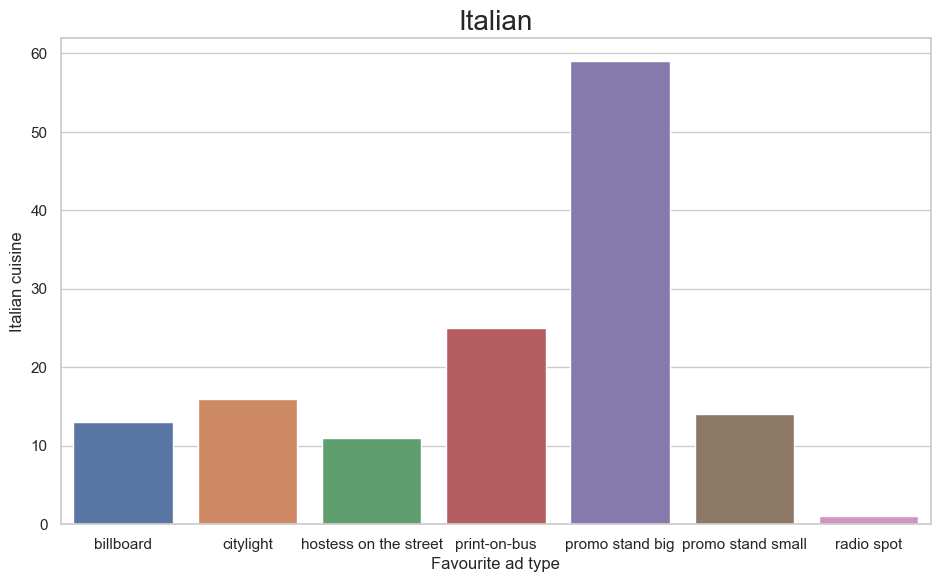

In [578]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine')
plt.title('Italian', fontsize=20);

<AxesSubplot:xlabel='Favourite ad type', ylabel='Italian cuisine'>

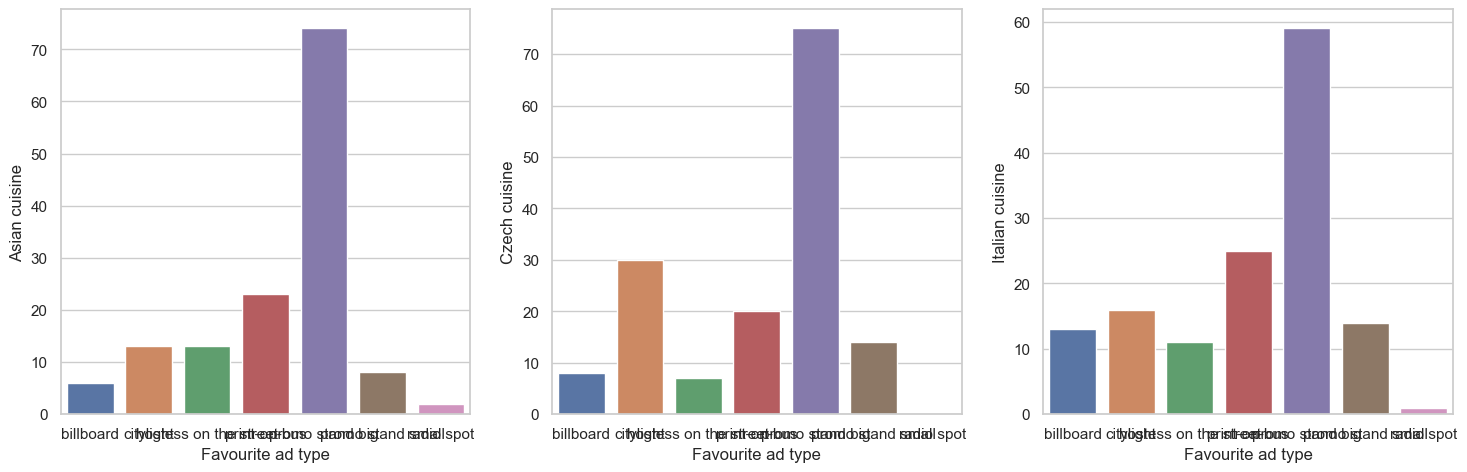

In [579]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5), dpi=100)

sns.barplot(data=asia, x='Favourite ad type', y='Asian cuisine', ax=axes[0])
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine', ax=axes[1])
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine', ax=axes[2])

# Более точная выборка дней по кухне и рекламе [cz, asian, it]

In [580]:
ad = cz['Favourite ad type'] == 'promo stand big'
quality = cz['Preferred quality'].between(0.25,0.4)
weekly = cz['Weekly income'].between(30,50)

In [581]:
cz_df = cz[ad & quality & weekly]

In [611]:
top_locations = cz_df.describe(include='object')

In [612]:
top_locations.drop(['count', 'unique'], inplace=True)

In [613]:
top_locations.transpose().reset_index().drop([0,1,2,3])

,index,top,freq
4,MON 0-8h,Industrial district,20
5,MON 8-16h,Industrial district,24
6,MON 16-24h,Housing district,31
7,TUE 0-8h,Outskirts,19
8,TUE 8-16h,Industrial district,22
9,TUE 16-24h,Housing district,33
10,WED 0-8h,Industrial district,22
11,WED 8-16h,Industrial district,18
12,WED 16-24h,Housing district,18
13,THU 0-8h,Outskirts,19


In [585]:
metriki = cz_df.describe()

In [586]:
metriki.loc[['mean', '50%']].transpose()

,mean,50%
Age,51.212121,52.00
Weekly income,37.878788,37.00
Preferred quality,0.331818,0.35


# WIP

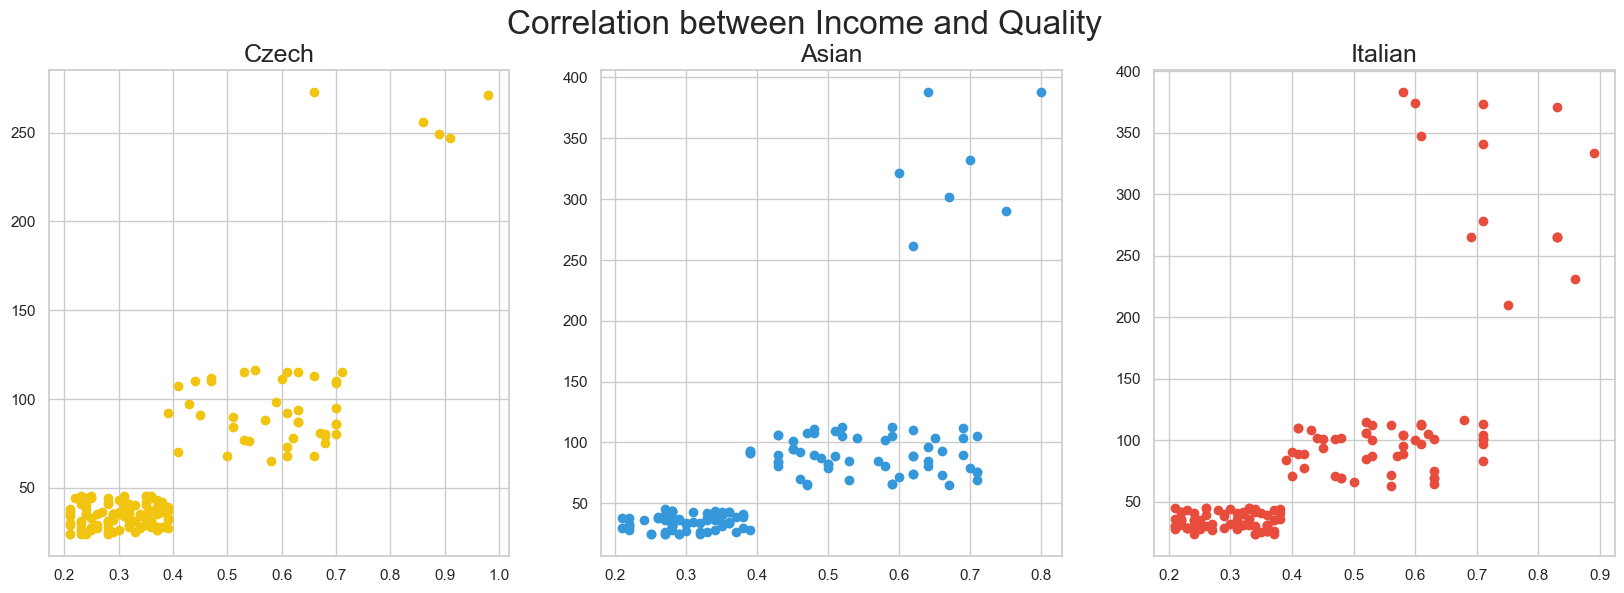

In [587]:
plt.figure(figsize=(18,6), dpi=100)
plt.suptitle("Correlation between Income and Quality", fontsize=24)
plt.tight_layout()

plt.subplot(1,3,1)
plt.title('Czech', fontsize=18)
plt.scatter(cz['Preferred quality'], cz['Weekly income'], label='Ceska', color='#f1c40f')

plt.subplot(1,3,2)
plt.title('Asian', fontsize=18)
plt.scatter(asian['Preferred quality'], asian['Weekly income'], label='Asian', color='#3498db')

plt.subplot(1,3,3)
plt.title('Italian', fontsize=18)
plt.scatter(it['Preferred quality'], it['Weekly income'], label='Italian', color='#e74c3c');

In [588]:
asian.iplot(
    x='Preferred quality',
    y='Weekly income',
    # Указываем категорию
    mode='markers',
    xTitle='Preferred quality',
    yTitle='Weekly income',
    title='Asian',
    bestfit=True,
    bestfit_colors=["blue"])